In [2]:
from sys import path
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os
from PIL import Image
import random
import numpy as np
import cv2

import  matplotlib.pyplot as plt


In [3]:
def _depth_norm(image):
        num_img=np.array(image)
        min_p=np.min(num_img)
        max_p=np.max(num_img)
        # print(f"min={min_p} , max={max_p}")
        return (num_img-min_p)/(max_p-min_p)*255

        

In [4]:
root = r"E:\KISUKE\SUNRGBD\SUNRGBD\kv1\b3dodata/"

image_folders=[f for f in os.listdir(root) if os.path.isdir("{}{}".format(root,f))]

files_B=["{}{}/depth_bfx/".format(root,f) for f in image_folders]
files_B=["{}{}".format(f,os.listdir(f)[0]) for f in files_B]


(427, 561)
255
0


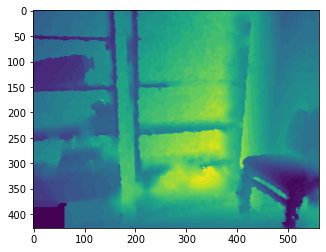

In [5]:
depth_img=cv2.imread(files_B[0])
depth_img=cv2.cvtColor(depth_img, cv2.COLOR_BGR2GRAY)
depth_img=_depth_norm(depth_img).astype(np.uint8)
print(np.shape(depth_img))
print(np.max(depth_img))
print(np.min(depth_img))

plt.imshow(depth_img)
plt.show()


(427, 561, 3)
255
0


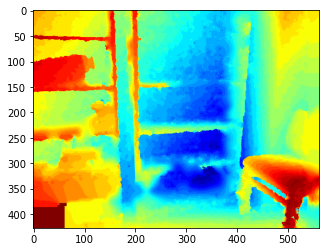

In [6]:
semi_color=cv2.applyColorMap(depth_img, cv2.COLORMAP_JET)
print(np.shape(semi_color))
print(np.max(semi_color))
print(np.min(semi_color))
plt.imshow(semi_color)
plt.show()


# 全部のDepthに疑似カラー（JET）を当てはめていく
---

In [7]:
temp="depth_color"

def convert_color(depth):
    depth=cv2.cvtColor(depth, cv2.COLOR_BGR2GRAY)
    depth=_depth_norm(depth).astype(np.uint8)
    return cv2.applyColorMap(depth, cv2.COLORMAP_JET)

In [8]:
convert_path=[f"{root}{f}/depth_color/" for f in image_folders]
for p in convert_path:
    if not os.path.exists(p):
        os.mkdir(p)
convert_path=[ p+"depth_color.png" for p in convert_path]

In [9]:
#Let’ｓ　Convert!

for i in range(len(files_B)):
    img=cv2.imread(files_B[i])
    semi_clr=convert_color(img)
    cv2.imwrite(convert_path[i],semi_clr)